# Applied Statistics Winter 2024 Project

**by Nur Bujang**

project.ipynb
***

# Title: Analysis of PlantGrowth Data Set

### Project Description

Complete the project in a single notebook called `project.ipynb` in your repository.
The same style should be used as detailed above: explanations in MarkDown and code comments, clean code, and regular commits.
Use plots as appropriate.

In this project, you will analyze the [PlantGrowth R dataset](https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv).
You will find [a short description](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html) of it on [Vicent Arel-Bundock's Rdatasets page](https://vincentarelbundock.github.io/Rdatasets/).
The dataset contains two main variables, a treatment group and the weight of plants within those groups.

1. Download and save the dataset to your repository.

2. Describe the data set in your notebook.

3. Describe what a t-test is, how it works, and what the assumptions are.

4. Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.


### Abstract



### 1.0 Plan

1. Download and save dataset
    - import pandas as pd , import numpy as np
    - url, df=pd.read_csv, df.to_csv
    - df.head, df.tail

2. Describe the data set
    - df.info, df.describe

3. Describe t-test, assumptions
    - check for normality (qq, shapiro), equal variance (levene? bartlett), equal sample size, independence

4. t-test for trt1 and trt2
    - Set null and alternative hypothesis
    - alpha
    - import numpy as np, from scipy import stats
    - separate group into trt1, trt2, crtl
    - ttest_ind
    - if statement to compare pval with alpha

5. ANOVA for crtl, trt1, trt2 - assumptions
    - Set null and alternative hypothesis
    - alpha, crtl
    - fstat,fpval = stats.f_oneway(crtl, trt1, trt2)
    - if statement compare pval with alpha

6. Why, for > 2 groups, ANOVA is more appropriate?

### 2.0 Methods and Implementation

### 2.1 Download and save dataset

The PlantGrowth.csv dataset <a href="https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv">(Arel-Bundock, n.d.)</a> was retrieved from <a href="https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html">(Arel-Bundock, n.d.)</a>.

Because the data is separated by commas, pandas.read_csv was performed to read the values into a data frame <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html">(Pandas, n.d.)</a>. Later, the csv file was saved into the folder using df.to_csv <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html">(Pandas, n.d.)</a>.

To ensure that the csv file was saved properly, df.head <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html">(Pandas, n.d.)</a> and df.tail <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html">(Pandas, n.d.)</a> were performed to look at the first and last five lines of the dataset. 

In [1]:
import pandas as pd
import numpy as np

url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv"
df=pd.read_csv(url)
df.to_csv("PlantGrowth.csv", index=False)
df.head()


,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [2]:
df.tail()

,rownames,weight,group
25,26,5.29,trt2
26,27,4.92,trt2
27,28,6.15,trt2
28,29,5.80,trt2
29,30,5.26,trt2


### 2.2 Describe the data set

To describe the basic information of the dataset, df.info was generated <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html">(The Pandas Development Team, 2022)</a>. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


This dataset compares plant dried weight from a plant growth experiment subjected under control, treatment1, and treatment2 conditions. It contains 30 instances on three columns, which are rownames, weight, and group.

Column rownames is a 64-bit integer type of whole numbers (without decimal points), and with no missing values. This seems to be row labels only and will not be included in the statistical analysis.

Column weight is a 64-bit floating-point numbers data type, which contains decimal points. Even if the column contains both integers and floats, the column will assign it as floats to retain the decimal values <a href="https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format.html">(Gosset and Wright, 2017)</a>. Weight is a continuous numerical data, which is a type of quantitative data and can contain any number of measurements between two points <a href="https://www.g2.com/articles/discrete-vs-continuous-data#what-is-continuous-data">(Zangre, 2024)</a>. This column has no missing values. Pandas default to float if there are missing values in case they have decimals <a href="https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format.html">(Gosset and Wright, 2017)</a>. In this dataset, weight contains the dried weight of plants in grams.

Column group is of type object, without missing values. The object data type is often used for text or nominal categorical data type but can represent any data type, including strings, lists, integers, or custom objects <a href="https://numpy.org/devdocs/reference/arrays.dtypes.html">(NumPy Developers, n.d.)</a>. Nominal categorical data is a type of qualitative categorical data that represents categories without specific ranking or order among them <a href="https://www.statisticssolutions.com/levels-of-measurement/">(Statistics Solutions, 2017)</a>. In this dataset, group contains labels that represent three different conditions, which are control, treatment1, and treatment2.

In [4]:
# drop column rownames because they are labels only
df.drop(columns=['rownames'], inplace=True)

# describe dataset
df.describe()

# OR
# exclude rownames because they are labels only
#df.iloc[:, 1:].describe() # select all rows, column 1 onwards

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


The PlantGrowth.csv is a complete dataset. 'Count' shows that columns rownames and weight contain 30 non-null (non-missing) values in 30 rows.

Mean or average value is calculated by totaling the sum of all values and dividing it by the count, which pinpoints the general central location within the dataset <a href="https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php">(Laerd Statistics, 2018)</a>. However, outliers can distort the mean, thus misrepresenting the average of the data <a href="https://www.speedcommerce.com/what-is/outlier/">(Speed Commerce, 2023)</a>. The mean for weight is 5.073.

Std (standard deviation) measures the dispersion of the data around the mean <a href="https://www.nlm.nih.gov/oet/ed/stats/02-900.html">(National Library of Medicine, 2012)</a>. A low standard deviation indicates that the data is concentrated closely around the mean, and a high value indicates that the values are spread farther away from the mean <a href="https://en.wikipedia.org/wiki/Standard_deviation">(Wikipedia Contributors, 2019)</a>. From the dataset, column weight is concentrated around the mean.

Min is the smallest value in the dataset, however, if the value is extremely low, it could be an outlier <a href="https://study.com/academy/lesson/maximums-minimums-outliers-in-a-data-set-lesson-quiz.html">(Cowley, 2021)</a>. The min for weight is 3.590.

Quartiles split sorted data into four equal parts which provide an insight into the middle point and spread of the data, whether it is symmetrical or skewed and the presence of outliers <a href="https://en.wikipedia.org/wiki/Quartile">(Wikipedia, 2021)</a>. If the lower quartile is farther from the median than the upper quartile, the distribution is negatively/left skewed with a longer left tail <a href="https://corporatefinanceinstitute.com/resources/data-science/negatively-skewed-distribution/">(Taylor, 2022a)</a>. A positively/right-skewed distribution with a longer right tail occurs when <a href="https://corporatefinanceinstitute.com/resources/data-science/positively-skewed-distribution/">(Taylor, 2022b)</a>.

25th percentile or first quartile describes the spread of the lower section of the dataset. For column weight, 25% of the data is below 4.55 while the higher 75% data is above 4.55. The distance between the lower quartile and the median (0.605) is higher than the distance between the upper quartile and the median (0.375), suggesting a negatively-skewed (left-skewed) distribution for column weight.

50th percentile / second quartile / median divides the sorted dataset into two equal portions (lower and upper) <a href="https://en.wikipedia.org/wiki/Median">(Wikipedia, 2020)</a>. Half of the dataset in column weight is lower than 5.155.

75th percentile or third quartile describes the upper segment of the dataset. 75% of the data for column weight is below 5.53 while the rest (higher 25%) are above 5.53.

Finally, max is the biggest value in the data, which could be an outlier if the value is exceptionally high <a href="https://study.com/academy/lesson/maximums-minimums-outliers-in-a-data-set-lesson-quiz.html">(Cowley, 2021)</a>. The max for weight is 6.310. 

### 2.3 Describe what a t-test is, how it works, and what the assumptions are

### 2.3.1 T-test

A Student's t-test is a statistical analysis used to compare the means of two groups to see if they are significantly different from each other <a href="https://en.wikipedia.org/wiki/Student%27s_t-test">Wikipedia Contributors (2019c)</a>. The t-test is performed when data is limited (small sample size, n < 30) and assumed to have a normal distribution <a href="https://www.datacamp.com/tutorial/t-test-vs-z-test">(Thevapalan, 2024)</a>. It is used in hypothesis testing where the test statistic follows a t-distribution, which resembles the standard normal distribution (bell-shaped and symmetrical) but with heavier tails <a href="https://en.wikipedia.org/wiki/Student%27s_t-distribution">Wikipedia Contributors (2019b)</a>. The heavier tails account for the variability in small samples against the unknown population variance <a href="https://www.datacamp.com/tutorial/t-test-vs-z-test">(Thevapalan, 2024)</a>.

According to <a href="https://en.wikipedia.org/wiki/Student%27s_t-test">Wikipedia Contributors (2019c)</a>, there are One-sample t-test, Independent (Unpaired)Two-sample t-test and Paired (Dependent) two-sample t-test. One-sample t-test determines whether the mean of one sample significantly deviates from a known population mean (alternative hypothesis) or equal to that standard (null hypothesis) <a href="https://www.datacamp.com/tutorial/t-test-vs-z-test">(Thevapalan, 2024)</a>. The assumption is that the sample mean follows a normal distribution <a href="https://en.wikipedia.org/wiki/Student%27s_t-test">Wikipedia Contributors (2019c)</a>. 

Independent (Unpaired) Two-sample t-test compares the means of two independent groups that are not correlated to determine if they are significantly different from each other (alternative hypothesis) or equal (null hypothesis) <a href="https://www.graphpad.com/guides/the-ultimate-guide-to-t-tests">(GraphPad, 2024)</a>.

Paired (Dependent) two-sample t-test compares means of matched pairs or the same group at different times or conditions (repeated measures) to see if they are significantly different from each other (alternative hypothesis) or equal (null hypothesis) <a href="https://www.graphpad.com/guides/the-ultimate-guide-to-t-tests">(GraphPad, 2024)</a>. It is better in avoiding type II error (false negative) compared to Independent two-sample t-test <a href="https://en.wikipedia.org/wiki/Student%27s_t-test">Wikipedia Contributors (2019c)</a>. 

### 2.3.2 How does a t-test work?

- Determine which t-test to use and degrees of freedom

Based on the experimental design, we can decide the type of t-test to perform, and therefore, the t-test formulae to use. Based on the data, we can calculate the degrees of freedom, which is the number of values that can vary in an analysis. Because the number of parameters we can estimate are restricted by available data, it is calculated by subtracting the number of parameters or relationships from the sample size <a href="https://statisticsbyjim.com/hypothesis-testing/degrees-freedom-statistics/">(Frost, 2017)</a>. 



- Set up hypothesis

The null hypothesis assumes that the two group means are not significantly different from each other ($ \mu_1 = \mu_2 $).

The alternative hypothesis assumes that the two group means are significantly different from each other ($ \mu_1 \neq \mu_2 $).

check normality
Test for Equality of Variances??? levene
 sample size =
independence

- Set an $\alpha$ level

The $\alpha$ level is a treshold that determines the significance level of a test, which is the probability of rejecting the null hypothesis when the null hypothesis is true <a href="https://en.wikipedia.org/wiki/Statistical_significance">Wikipedia Contributors (2019c)</a>. Later, $\alpha$ will be compared with the $p$-value from the t-test. $p$-value is the likelihood of getting observed data when the null hypothesis is true <a href="https://en.wikipedia.org/wiki/P-value">Wikipedia Contributors (2019a)</a>. If $p \leq \alpha$, we reject the null hypothesis, thus concluding that there is a significant difference. If $p > \alpha$, we fail to reject the null hypothesis. 

- Calculate t-value

One-sample t-test compares the mean of a single sample to a known value or hypothesized population mean, assessing whether the sample mean statistically and significantly differs from the reference value, while taking into account the variability within the sample <a href="https://www.graphpad.com/quickcalcs/onesamplet1/">(GraphPad, n.d.)</a>.

For an independent two-sample t-test, the test statistic is calculated by dividing the difference between the two sample means by the estimated standard error, which can be pooled or unpooled <a href="https://sites.utexas.edu/sos/guided/inferential/numeric/onecat/2-groups/independent/two-sample-t/">(The University of Texas at Austin, n.d.)</a>. This standard error reflects the overall variation across both groups <a href="https://sites.utexas.edu/sos/guided/inferential/numeric/onecat/2-groups/independent/two-sample-t/">(The University of Texas at Austin, n.d.)</a>.

For paired two-sample t-test, the mean difference between two related groups is calculated by first computing the difference for each pair, then evaluating whether the average difference is statistically and significantly different from zero, while taking into account the variability of the differences across pairs <a href="https://en.wikipedia.org/wiki/P-value">Wikipedia Contributors (2019a)</a>.


### 2.3.3 Assumptions

The assumptions that need to be met before conducting a Student's t-test are continuous/ordinal data, considerable sample size, independence (simple random sample), equal variances between groups, data is normally-distributed [(Maverick, 2021)](https://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp).  

#### 2.3.3.1 Continuous Data

Continuous Data can take on an infinite number of possible values within a given range[(Wikipedia, 2020a)](https://www.mybib.com/#/projects/JXA5Xa/citations). It is measured on an interval (without absolute zero) or ratio scale (with absolute zero) [(EBM Consult, LLC, n.d.)](https://www.ebmconsult.com/articles/continuous-interval-or-ratio-scale-data). Continuous data is particularly suited for t-test because the test relies on accuracy in means calculations. The rationale for using continuous data for a t-test is it often approximates a normal distribution, which meets t-test's normality requirement [(Curtin University Library, n.d.)](https://uniskills.library.curtin.edu.au/numeracy/statistics/normal-distribution/) and provides a valid mean and standard deviation calculation in each group. Continuous data can be visualised in histograms, box plots and QQplots.

#### 2.3.3.1.1 Histogram

First, the plant dry weight were separated into trt1, trt2 and ctrl categories using df.groupby <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html">(Pandas, n.d.)</a> where each unique values in column 'group' forms separate subgroups which includes corresponding weight values then puts it into a list.

In [5]:
# Form treatment subgroups from group

dfgroup = df.groupby('group')['weight'].apply(list) # first group by treatment, then takes corresponding weight, then puts it into a list
trt1w = dfgroup['trt1']
trt2w = dfgroup['trt2']
ctrlw = dfgroup['ctrl'] 

A histogram was generated using seaborn [(Waskom, n.d.)](https://seaborn.pydata.org/generated/seaborn.histplot.html) in 1x3 grid according to matplotlib [(Hunter et al., n.d.)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

In [12]:
# import library

import seaborn as sns
import matplotlib.pyplot as plt

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

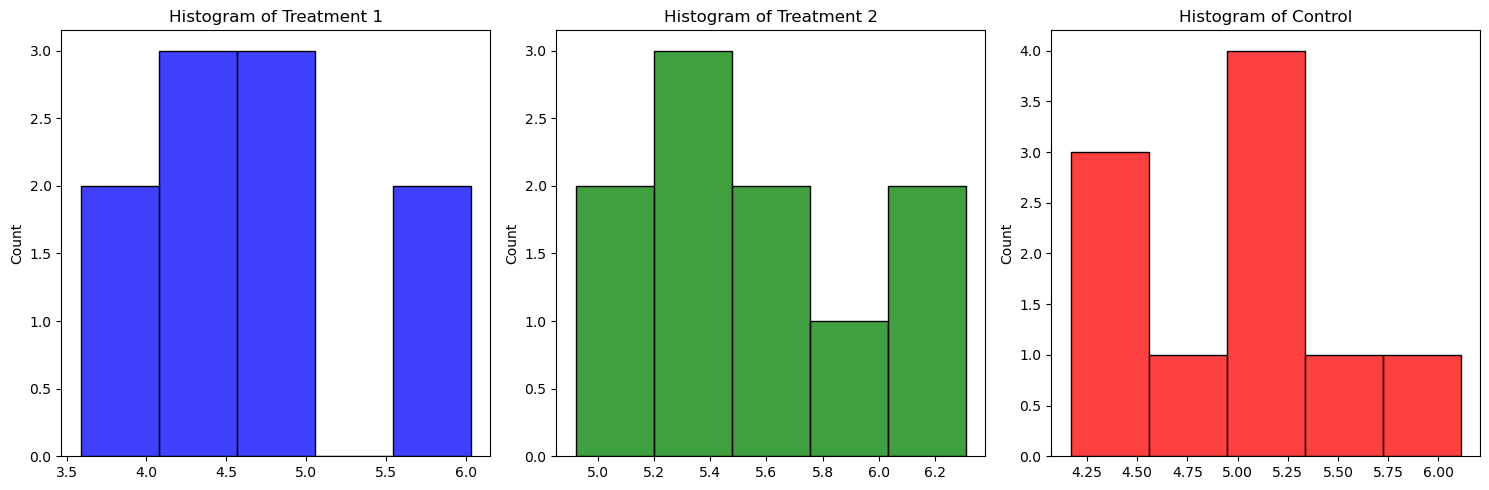

In [15]:
# Generate histogram for trt1, trt2 and ctrl

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row x 3 columns grid

sns.histplot(trt1w, bins=5, color='blue', ax=axes[0])
axes[0].set_title('Histogram of Treatment 1')

sns.histplot(trt2w, bins=5, color='green', ax=axes[1])
axes[1].set_title('Histogram of Treatment 2')

sns.histplot(ctrlw, bins=5, color='red', ax=axes[2])
axes[2].set_title('Histogram of Control')

plt.tight_layout()
plt.show();

The histogram for all 3 treatments are not informative enough, so box plot was generated.

#### 2.3.3.1.2 Box Plot

A box plot was generated using seaborn [(Waskom, n.d.)](https://seaborn.pydata.org/generated/seaborn.boxplot.html) and [(GeeksforGeeks, 2024)](https://www.geeksforgeeks.org/add-a-legend-to-a-seaborn-plots/). 

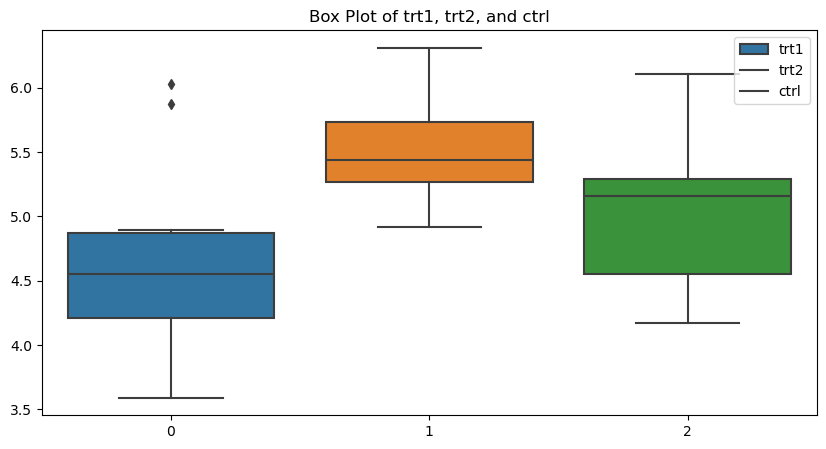

In [29]:
# Generate box plot for trt1, trt2 and ctrl

plt.figure(figsize=(10, 5))
sns.boxplot(data=[trt1w, trt2w, ctrlw])
plt.title('Box Plot of trt1, trt2, and ctrl')
plt.legend(labels=['trt1', 'trt2', 'ctrl'], loc= "upper right")

#### 2.3.3.2 Sample size 

equal and considerable

#### 2.3.3.3 Independence and Random Sampling

The second assumption is independent observations where the sample is a simple random sample [(Shaker, n.d.)](https://bookdown.org/content/f9d035ed-86ea-4779-ad01-31acc973f0dd/1.1-assumptions-independent-samples-t-test.html). 

independence https://en.wikipedia.org/wiki/Independence_(probability_theory)
https://www.graphpad.com/guides/the-ultimate-guide-to-t-tests
https://www.investopedia.com/terms/t/t-test.asp

Some examples of statistical tests used to check for randomness in sampling are Chi-Square Goodness-of-Fit Test, Kolmogorov-Smirnov (K-S) Test and Runs Test (Wald-Wolfowitz Test). 

Here, the Chi-Squared Goodness-of-Fit Test <a href="https://en.wikipedia.org/wiki/Chi-squared_test">(Wikipedia Contributors, 2019a)</a> was performed with stats.chisquare according to <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html">(The SciPy community, n.d.)</a>. 

#### 2.3.3.4 Homogeneity of Variance

variances are equal across groups 

levene? bartlett https://en.wikipedia.org/wiki/F-test_of_equality_of_variances


#### 2.3.3.4.1 Levene's Ttst / Bartlett's Test

#### 2.3.3.5 Test for Normality with Shapiro-Wilk Test

#### 2.3.3.5.1 QQplot

Before performing Shapiro test, a qqplot was generated using matplotlib <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html">(Hunter et al., n.d.)</a> and stats.probplot <a href="https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html">(Perktold et al., 2009)</a> to form the assumption that the data is normally distributed. Qqplot compares the quantiles of the data with the quantiles of a theoretical normal distribution.

The scipy.stats library was imported according to <a href="https://docs.scipy.org/doc/scipy/reference/stats.html">(The SciPy community, 2019)</a> and <a href="https://github.com/ianmcloughlin/2425_applied_statistics">McLoughlin (2024)</a>.

In [ ]:
from scipy import stats
import scipy.stats as stats
from scipy.stats import norm
import statsmodels as sm

# Determine significance level, alpha
alpha = 0.05

In [ ]:
# Generate Q-Q plots for each group

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1) # in grid 1 row, 3 columns, first plot
stats.probplot(trt1w, dist="norm", plot=plt) # subplot for trt1
plt.title("Q-Q Plot for Treatment 1")

# Q-Q plot for treatment group 2
plt.subplot(1, 3, 2) # in grid 1 row, 3 columns, second plot
stats.probplot(trt2w, dist="norm", plot=plt) # subplot for trt2
plt.title("Q-Q Plot for Treatment 2")

# Q-Q plot for control group
plt.subplot(1, 3, 3) # in grid 1 row, 3 columns, third plot
stats.probplot(ctrlw, dist="norm", plot=plt) # subplot for crtl
plt.title("Q-Q Plot for Control")

plt.tight_layout()
plt.show()

The probability plots show that the data mostly deviates from the straight line. That and  given the small sample size, it is difficult to say that it approximately follows normal distribution. 

#### 2.3.3.5.2 Shapiro-Wilk Test

Next, Shapiro-Wilk test was performed according to <a href="https://scipy.github.io/devdocs/reference/generated/scipy.stats.shapiro.html">The SciPy community (2024)</a>.
It tests whether there is evidence to suggest that the data is not normally distributed <a href="https://github.com/ianmcloughlin/2425_applied_statistics">McLoughlin (2024)</a>.

For Shapiro-Wilk test, the hypotheses are:

**Null Hypothesis assumes that the data is normally distributed <a href="https://scipy.github.io/devdocs/reference/generated/scipy.stats.shapiro.html">(The SciPy community, 2024)</a>.**

**The Alternative Hypothesis assumes that data is not normally distributed.**

In [ ]:
# Perform Shapiro-Wilk on weight data from trt1, trt2 and crtl

shaptrt1, pshaptrt1 = stats.shapiro(trt1w)
shaptrt2, pshaptrt2 = stats.shapiro(trt2w)
shapctrl, pshapctrl = stats.shapiro(ctrlw)

shaptrt1, pshaptrt1, shaptrt2, pshaptrt2, shapctrl, pshapctrl

In [ ]:
if pshaptrt1 < alpha:
    print("Null Hypothesis is rejected. There is evidence to conclude that data is not normally distributed in Treatment 1.")
else:
    print("Null Hypothesis cannot be rejected. There is no evidence to suggest that data is not normally distributed in Treatment 1.")

In [ ]:
if pshaptrt2 < alpha:
    print("Null Hypothesis is rejected. There is evidence to conclude that data is not normally distributed in Treatment 2.")
else:
    print("Null Hypothesis cannot be rejected. There is no evidence to suggest that data is not normally distributed in Treatment 2.")

In [ ]:
if pshapctrl < alpha:
    print("Null Hypothesis is rejected. There is evidence to conclude that data is not normally distributed in Control.")
else:
    print("Null Hypothesis cannot be rejected. There is no evidence to suggest that data is not normally distributed in Control.")

### 2.4 Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2

#### 2.4.1 Independent Two-Sample T-test

When all assumptions for t-test have been satisfied, t-test was performed. Independent (unpaired) Two-sample t-test was selected because trt1 and trt2 are two sets of independent samples <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html">(The SciPy community, n.d.)</a>. The formula for this t-test is: 
$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

where:
- $ \bar{X}_1 $ and $ \bar{X}_2 $ are the sample means,
- $ s_1 $ and $ s_2 $ are the sample standard deviations,
- $ n_1 $ and $ n_2 $ are the sample sizes.

Here, the test statistic is calculated by dividing the difference between the two sample means by the estimated standard error, which can be pooled or unpooled and the estimated standard error represents the combined variation across both groups <a href="https://sites.utexas.edu/sos/guided/inferential/numeric/onecat/2-groups/independent/two-sample-t/">(The University of Texas at Austin, n.d.)</a>.

Two-sided because I am only interested in any change between the two means.

First, the hypotheses were set: 

**Null Hypothesis assumes that trt1 and trt2 means are equal.**

**Alternative Hypothesis assumes that trt1 and trt2 means are not equal.**

In [ ]:
# import library 
#from scipy.stats import ttest_ind

In [ ]:
# Run t-test for trt1 and trt2

ttest, ttpval = stats.ttest_ind(trt1w, trt2w, alternative='two-sided')
ttest, ttpval

In [ ]:
if ttpval < alpha:
    print("Null Hypothesis is rejected. There is evidence to conclude that there is a difference in plant dry weight between trt1 and trt2.")
    
else:
    print("Null Hypothesis cannot be rejected. We can continue to assume that there is no difference in plant dry weight between trt1 and trt2.")

### 2.5 Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2

According to <a href="https://www.questionpro.com/blog/anova-testing/#Types_of_ANOVA_testing">Timpany (2016)</a>, there are many types of anova

**Assumptions for ANOVA**

According to <a href="https://real-statistics.com/one-way-analysis-of-variance-anova/assumptions-anova/">(Howell, 2010)</a>, the assumptions for ANOVA are normally distributed data, equal variances, unrelated samples, randomly sampled and independent observations and the effects of the factors are cumulative. The tests for normality, equality of variances, equal sample size and independence have satisfied the conditions of ANOVA.

#### 2.5.1 One-way ANOVA

One-way ANOVA was performed on the three conditions according to <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html">The SciPy community (2014)</a> by comparing the variance within each condition to the variance between conditions. 

First, the hypotheses were set: 

**Null Hypothesis assumes that there is no difference in means among crtl, trt1 and trt2.**

**Alternative Hypothesis assumes that there is a difference in means among crtl, trt1 and trt2.**

$\alpha$ = 0.05

The scipy.stats library <a href="https://docs.scipy.org/doc/scipy/reference/stats.html">(The SciPy community, 2019)</a> has been imported. One-way ANOVA, stats.f_oneway is available in the library.

Treatments trt1 and trt2 were already instantiated above.


In [ ]:
# Perform ANOVA for all treatments

fstat, fpval = stats.f_oneway(trt1w, trt2w, ctrlw)
fstat, fpval

In [ ]:
if ttpval < alpha:
    print("Null Hypothesis is rejected. There is evidence to conclude that there is a difference in means among crtl, trt1 and trt2.")
else:
    print("Null Hypothesis cannot be rejected. We can continue to assume that there is no difference in means among crtl, trt1 and trt2.")

### 2.6 Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups

For more than two groups, ANOVA offers a simple, one-step test to compare all means compared to pairwise tests. It is quicker, more efficient, and prevents confusion because all the means are compared simultaneously instead of analysing different pair combinations from multiple groups. This is especially difficult when the number of groups is high, making calculations more unmanageable, making interpretations difficult, and increasing the chance of making mistakes.

Because each test carries its own risk of Type I error (false positive by incorrectly rejecting true null) <a href="https://en.wikipedia.org/wiki/Type_I_and_type_II_errors">(Wikipedia, 2021b)</a> if each test has a 5% chance of Type I error, multiple pairwise t-tests will cumulatively inflate this risk. In contrast, the Type I error for a single ANOVA test will remain at a 5% chance, regardless of the number of groups.

According to <a href="https://en.wikipedia.org/wiki/Power_(statistics)">Wikipedia Contributors (2019d)</a>, the power of test is the probability of correctly rejecting the null hypothesis when the alternative hypothesis is true. When testing multiple hypotheses for more than two groups, the chance of Type I error (false positive) increases, thus requiring the need for Bonferroni correction <a href="https://en.wikipedia.org/wiki/Bonferroni_correction">Wikipedia Contributors (2019d)</a>. Because Bonferroni correction tests each hypothesis at alpha/number of hypothesis, the smaller corrected alpha level requires stronger evidence to reach significance, thus increasing the risk of a Type II error <a href="https://en.wikipedia.org/wiki/Bonferroni_correction">Wikipedia Contributors (2019d)</a>. Type II error or false negative is failing to reject a false null hypothesis <a href="https://en.wikipedia.org/wiki/Type_I_and_type_II_errors">(Wikipedia, 2021b)</a>, which consequently lowers the probability of detecting a real effect for each test compared to ANOVA.

ANOVA is better for multiple groups because it divides variance into Within-Group Variance and Between-Group Variance. The F-statistic for ANOVA  is the ratio of variance between treatments to variance within treatments (or error variance) <a href="https://en.wikipedia.org/wiki/Analysis_of_variance">(Wikipedia Contributors, 2019a)</a>. According to <a href="https://blog.minitab.com/en/adventures-in-statistics-2/understanding-analysis-of-variance-anova-and-the-f-test">(Minitab, 2016)</a>, the denominator Mean Square Within (MSW), which is the pooled estimate of within-group variance, is like a background noise whose values should be low to be able to differentiate between signal (differences between group means) and noise (random variability within groups). The pooled variance also provides a more precise variance estimation because of the larger data pool from all combined groups and a reduced influence of outliers <a href="https://en.wikipedia.org/wiki/Pooled_variance">(Wikipedia Contributors, 2024)</a>. This higher variance precision increases the statistical power of the test to detect true differences and reduces the chance of Type II errors (failing to detect a true effect) <a href="https://en.wikipedia.org/wiki/Pooled_variance">(Wikipedia Contributors, 2024)</a>. On the other hand, the pairwise comparison of highly variable individual variances, when repeated across multiple pairs in multiple t-tests, will result in low statistical power.

One could argue that because ANOVA's overall hypothesis testing does not specify which group has a significantly different mean, while with a t-test, we can identify whether a mean is significantly greater than or less than the other. However, one can always proceed with a post hoc test to identify where the differences lie such as Student–Newman–Keuls (SNK) test and Tukey's HSD (honestly significant difference) test <a href="https://www.ibm.com/docs/en/spss-statistics/beta?topic=anova-one-way-post-hoc-tests">(IBM Corporation, n.d.)</a>. Student–Newman–Keuls (SNK) is a stepwise, pairwise comparison method where means are ordered from highest to lowest and compared starting from the closest ranks and then moving further <a href="https://en.wikipedia.org/wiki/Newman%E2%80%93Keuls_method">(Wikipedia Contributors, 2020)</a>. Tukey's HSD (honestly significant difference) test is a single-step method that compares all possible pairs of group means Means are ordered from highest to lowest <a href="https://en.wikipedia.org/wiki/Tukey%27s_range_test">(Wikipedia Contributors, 2019h)</a>. 

## 3.0 Conclusion

## 4.0 References



***

## End of project.ipynb